Copula small test

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# univariate test without copula

In [137]:
myArr = np.random.randn(100000)

array([ 0.13388675,  0.27963661, -0.48781725, ...,  0.01341867,
       -0.26756732,  0.23303362])

In [139]:
myArr = np.sort(myArr)

In [140]:
myArr

array([-4.4330541 , -4.20383983, -4.18980473, ...,  4.0326282 ,
        4.27038384,  4.29839531])

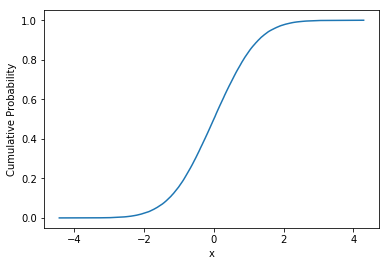

In [141]:
plt.plot(myArr,np.linspace(0,1, num=len(myArr)+2)[1:-1])
plt.ylabel('Cumulative Probability')
plt.xlabel('x')
plt.show()

In [142]:
myMat = np.matrix([myArr,np.linspace(0,1, num=len(myArr)+2)[1:-1]])

In [143]:
np.asarray(myMat[1,:]).reshape(-1)

array([9.99990e-06, 1.99998e-05, 2.99997e-05, ..., 9.99970e-01,
       9.99980e-01, 9.99990e-01])

In [2]:
from scipy import stats


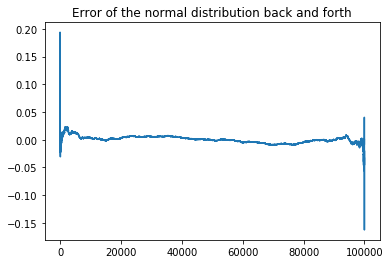

In [152]:
plt.plot(stats.norm.ppf(np.asarray(myMat[1,:]).reshape(-1))-myArr)
plt.title('Error of the normal distribution back and forth')
plt.show()

# multivariate

In [178]:
myUnconditionMultiVariateIni = np.random.randn(5,10000)

In [179]:
myUnconditionMultiVariateIni = np.sort(myUnconditionMultiVariateIni)
myUnconditionMultiVariateIni

array([[-3.71561868, -3.59908215, -3.54048881, ...,  3.44822226,
         3.45608387,  3.83624689],
       [-4.11936361, -3.87359493, -3.87166141, ...,  3.47101388,
         3.6241096 ,  3.9093704 ],
       [-3.96671164, -3.85558057, -3.59012181, ...,  3.70376117,
         3.8162033 ,  3.88657488],
       [-3.5416501 , -3.36949797, -3.29946078, ...,  3.43982047,
         3.46100793,  3.6228398 ],
       [-4.07874187, -3.94199284, -3.93827708, ...,  3.32717482,
         3.58859485,  3.63509104]])

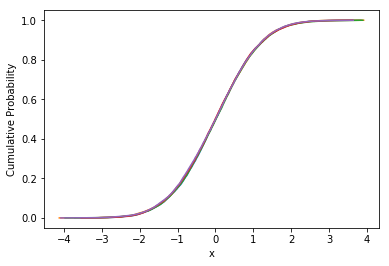

In [180]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(myUnconditionMultiVariateIni[i,:],np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i,:])+2)[1:-1])
plt.ylabel('Cumulative Probability')
plt.xlabel('x')
plt.show()

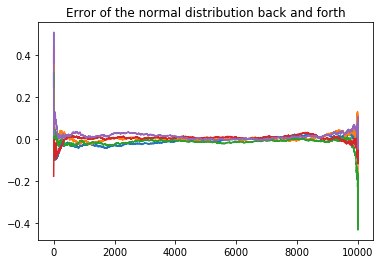

In [199]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(stats.norm.ppf(np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i])+2)[1:-1])-myUnconditionMultiVariateIni[i])
plt.title('Error of the normal distribution back and forth')
plt.show()


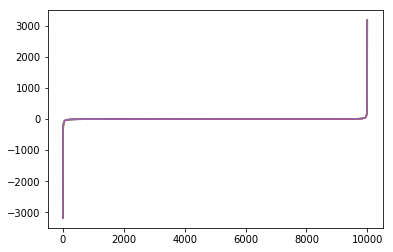

In [204]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(stats.cauchy.ppf(np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i])+2)[1:-1]))
plt.show()

# Copula : 
Instead of using each variable as separate univariate, lets do a copula and create a joint distribution in the space of interest

ex:

In [203]:
myMulti = stats.multivariate_normal(mean=[0,0], cov=[[1,.8],[.8,1]])

In [204]:
X,Y = np.meshgrid(np.arange(-5,5.1,.1),np.arange(-5,5.1,.1), sparse = False)
z = np.array([myMulti.pdf([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)

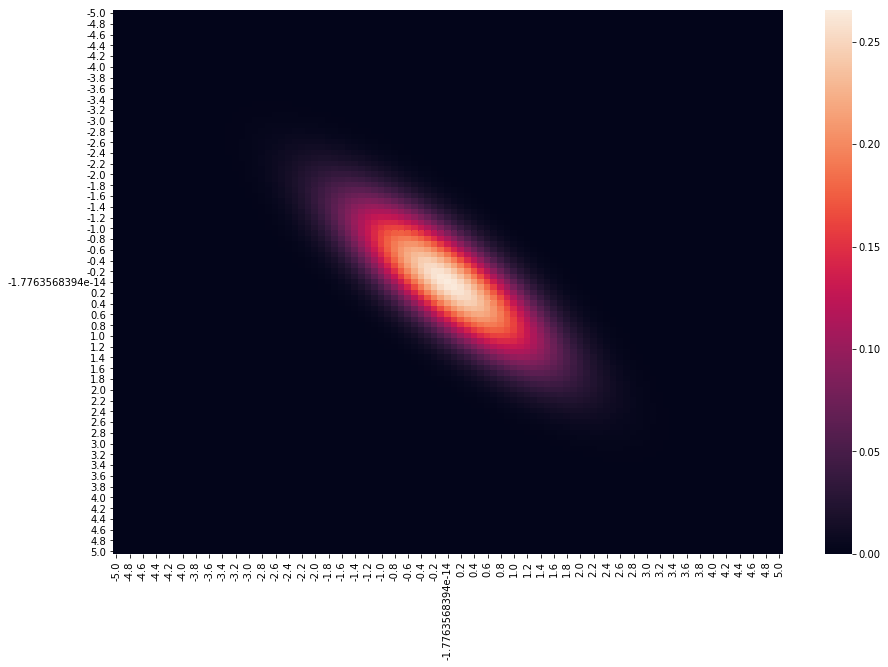

In [205]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(Z, index=X[0], columns=X[0]))
plt.show()

In [206]:
np.matrix(Z)

matrix([[  2.46491006e-07,   3.20927228e-07,   4.06394964e-07, ...,
           1.92399342e-53,   1.64650472e-54,   1.37043564e-55],
        [  3.20927228e-07,   4.27231280e-07,   5.53166388e-07, ...,
           2.21108756e-52,   1.93471202e-53,   1.64650472e-54],
        [  4.06394964e-07,   5.53166388e-07,   7.32317669e-07, ...,
           2.47140867e-51,   2.21108756e-52,   1.92399342e-53],
        ..., 
        [  1.92399342e-53,   2.21108756e-52,   2.47140867e-51, ...,
           7.32317669e-07,   5.53166388e-07,   4.06394964e-07],
        [  1.64650472e-54,   1.93471202e-53,   2.21108756e-52, ...,
           5.53166388e-07,   4.27231280e-07,   3.20927228e-07],
        [  1.37043564e-55,   1.64650472e-54,   1.92399342e-53, ...,
           4.06394964e-07,   3.20927228e-07,   2.46491006e-07]])

In [207]:
#E(X)E(Y) 
EX2 = np.sum(np.sum(Z,axis=1)*X[0]*X[0])
EY2 = np.sum(np.sum(Z,axis=0)*X[0]*X[0])
EX = np.sum(np.sum(Z,axis=1)*X[0])
EY = np.sum(np.sum(Z,axis=0)*X[0])

In [208]:
EXY = np.sum(np.ones((len(Z),len(Z)))*X[0]*X[0].reshape(101,1)*Z)

In [209]:
#covar
(EXY-EX*EY)/np.sqrt((EX2-EX**2)*(EY2-EY**2))

0.79999687018087973

In [210]:
# We are going to transform these variables using copulas and look at the correlation in this new space

In [211]:
(EY2-EY**2)

99.998117252309271

Then we can run cholesky decomposition and a MC sim from another known process

In [212]:
np.sum(np.sum(Z,axis=0)*X[0])

1.0235410609349405e-15

In [213]:
np.sum(np.sum(Z,axis=0)*X[0]*X[0])

99.998117252309271